In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fsmodels import MultiExpFrequencyScan

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Wrapper for sklearn

In [2]:
class MFScan(BaseEstimator, RegressorMixin, MultiExpFrequencyScan):

    def __init__(self,
                 n_exps=1,
#                  filling_pulse = 20*10**-6,
                 learning_rate = 0.1,
                 n_iters = 1000,
                 stop_val = None,
                 verbose = False):

        super().__init__(n_exps=n_exps,
#                          filling_pulse = filling_pulse,
                         exps_params=[ [np.random.uniform(low=-3.5, high=-1), 1.0] for _ in range(n_exps) ],
                         learning_rate = learning_rate,
                         n_iters = n_iters,
                         stop_val = stop_val,
                         verbose = verbose,
                         tf_in_out = False
                        )
        
        self.fit_results_ = pd.DataFrame()
        
        
    def fit(self, X, y):
        self.fit_results_ = super().fit(f_powers=X, dlts_vals=y)
        
        return self
    
    
    def predict(self, X):
        return super().__call__(f_powers=X)

In [3]:
frequency_powers = np.linspace(0, 3.5, 1000)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

In [4]:
fs = MFScan(n_exps=3)#, filling_pulse=2*10**-5)

fs.exps_params = [[-1.0, 3.5],
                  [-2.3, 3.0],
                  [-3.5, 2.5]]

experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

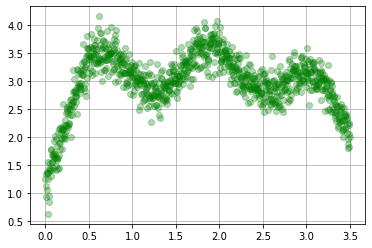

In [5]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [6]:
n_exps = 3

fs = MFScan(n_exps=n_exps,
            n_iters=200,
            stop_val=10**-5,
            verbose=True
           )

initial_model = fs(frequency_powers)

fs.fit(X=frequency_powers, y=experimental_dlts)

fit_results = fs.fit_results_
fit_results

iter # 0
exps_params:
 [[-1.57242723  1.        ]
 [-1.43677943  1.        ]
 [-2.78975996  1.        ]]
Loss: 3.840346762934918
iter # 1
exps_params:
 [[-1.56307356  1.12060634]
 [-1.41401131  1.12285903]
 [-2.77685196  1.1359409 ]]
Loss: 3.3743400080399395
iter # 2
exps_params:
 [[-1.55192117  1.22682404]
 [-1.3844291   1.23188516]
 [-2.769909    1.26274846]]
Loss: 2.98890262189833
iter # 3
exps_params:
 [[-1.54049759  1.32060684]
 [-1.34898264  1.32901079]
 [-2.76828986  1.38150513]]
Loss: 2.6651600041901125
iter # 4
exps_params:
 [[-1.53075209  1.40376062]
 [-1.30912726  1.41598086]
 [-2.77067195  1.49321415]]
Loss: 2.3892946556714487
iter # 5
exps_params:
 [[-1.52471784  1.47790484]
 [-1.26655778  1.49431071]
 [-2.77559271  1.59868773]]
Loss: 2.151555154270118
iter # 6
exps_params:
 [[-1.52415091  1.54447198]
 [-1.22293414  1.56529789]
 [-2.78188768  1.69849496]]
Loss: 1.944821463821465
iter # 7
exps_params:
 [[-1.53023047  1.60473569]
 [-1.17969638  1.63007853]
 [-2.78891556  1.7

iter # 63
exps_params:
 [[-2.2191492   2.78886687]
 [-0.98899141  3.21871419]
 [-3.422364    2.74814099]]
Loss: 0.06707979795475362
iter # 64
exps_params:
 [[-2.22169785  2.79503536]
 [-0.9893886   3.22800317]
 [-3.42521156  2.74420312]]
Loss: 0.0655585603633545
iter # 65
exps_params:
 [[-2.22415742  2.80100172]
 [-0.98977399  3.23694361]
 [-3.42794818  2.74024897]]
Loss: 0.06413312646738253
iter # 66
exps_params:
 [[-2.22653162  2.80677393]
 [-0.99014795  3.24554878]
 [-3.43057878  2.7362851 ]]
Loss: 0.06279684460037945
iter # 67
exps_params:
 [[-2.22882398  2.81235961]
 [-0.99051081  3.25383148]
 [-3.43310801  2.7323175 ]]
Loss: 0.061543567360059316
iter # 68
exps_params:
 [[-2.23103782  2.81776604]
 [-0.99086291  3.26180402]
 [-3.43554027  2.72835166]]
Loss: 0.060367610345937704
iter # 69
exps_params:
 [[-2.23317631  2.82300018]
 [-0.99120457  3.26947827]
 [-3.43787975  2.72439262]]
Loss: 0.059263714517571835
iter # 70
exps_params:
 [[-2.23524245  2.82806868]
 [-0.9915361   3.276865

iter # 125
exps_params:
 [[-2.28795377  2.96552135]
 [-1.00023901  3.44621097]
 [-3.49313996  2.56531168]]
Loss: 0.041560530186551405
iter # 126
exps_params:
 [[-2.28833007  2.96663702]
 [-1.00029827  3.44716631]
 [-3.49347976  2.5636737 ]]
Loss: 0.041510131380611145
iter # 127
exps_params:
 [[-2.28869615  2.967727  ]
 [-1.00035571  3.44808909]
 [-3.49380979  2.56206939]]
Loss: 0.04146211623448247
iter # 128
exps_params:
 [[-2.28905231  2.96879196]
 [-1.00041138  3.44898047]
 [-3.49413039  2.56049818]]
Loss: 0.04141636719714099
iter # 129
exps_params:
 [[-2.28939884  2.96983256]
 [-1.00046534  3.44984159]
 [-3.49444185  2.55895949]]
Loss: 0.0413727728660986
iter # 130
exps_params:
 [[-2.28973603  2.97084944]
 [-1.00051763  3.45067351]
 [-3.4947445   2.55745274]]
Loss: 0.04133122764021026
iter # 131
exps_params:
 [[-2.29006415  2.97184321]
 [-1.00056832  3.45147729]
 [-3.49503861  2.55597736]]
Loss: 0.041291631393944844
iter # 132
exps_params:
 [[-2.29038347  2.97281448]
 [-1.00061744  

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1,time_constatn_power_2,amplitude_2
0,3.840347,3,-1.572427,1.000000,-1.436779,1.000000,-2.789760,1.000000
1,3.37434,3,-1.563074,1.120606,-1.414011,1.122859,-2.776852,1.135941
2,2.988903,3,-1.551921,1.226824,-1.384429,1.231885,-2.769909,1.262748
3,2.66516,3,-1.540498,1.320607,-1.348983,1.329011,-2.768290,1.381505
4,2.389295,3,-1.530752,1.403761,-1.309127,1.415981,-2.770672,1.493214
...,...,...,...,...,...,...,...,...
157,0.040714,3,-2.296132,2.991205,-1.001454,3.465138,-3.500426,2.526901
158,0.040703,3,-2.296293,2.991751,-1.001475,3.465463,-3.500568,2.526079
159,0.040692,3,-2.296450,2.992286,-1.001496,3.465777,-3.500706,2.525276
160,0.040682,3,-2.296602,2.992809,-1.001517,3.466081,-3.500841,2.524490


In [7]:
fs.exps_params

array([[-2.29689602,  2.9938225 ],
       [-1.00155515,  3.46666113],
       [-3.50110121,  2.52296929]])

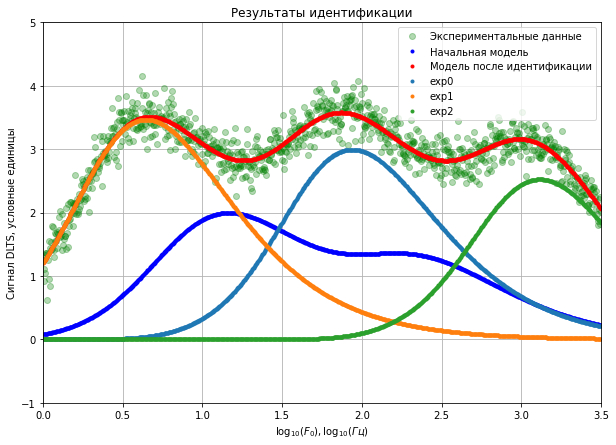

In [10]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    n_exps=fit_results.loc[0, 'n_exps']
    
    init_params = fit_results.iloc[0, :]
    init_params = [[init_params[f'time_constatn_power_{i}'], init_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs = MultiExpFrequencyScan(n_exps=n_exps, exps_params=init_params)
    initial_model = fs(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_params = [[final_params[f'time_constatn_power_{i}'], final_params[f'amplitude_{i}']] for i in range(n_exps)]
    
    fs.exps_params=final_params
    final_model = fs(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '.b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '.r', label='Модель после идентификации')

    for i, scan in enumerate(fs._fs_list):
        plt.plot(frequency_powers, scan(frequency_powers), '.', label=f'exp{i}')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax



fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

In [11]:
fs.get_params()

{'learning_rate': 0.1,
 'n_exps': 3,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': True}

In [12]:
fs.set_params(n_exps=4)

MFScan(n_exps=4, n_iters=200, stop_val=1e-05, verbose=True)

In [13]:
fs.get_params()

{'learning_rate': 0.1,
 'n_exps': 4,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': True}

In [14]:
fs.score(X=frequency_powers, y=experimental_dlts)

0.8510909302650618

# K-fold Cross-Validation and hyperparameter tuning

In [15]:
X_train, X_test, y_train, y_test = train_test_split(frequency_powers, experimental_dlts, test_size=0.2)

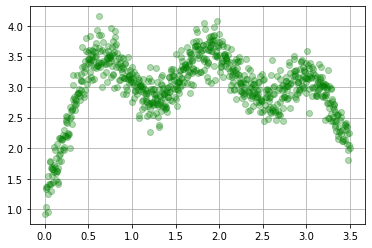

In [16]:
plt.plot(X_train, y_train, 'og', alpha=0.3)
plt.grid()
plt.show()

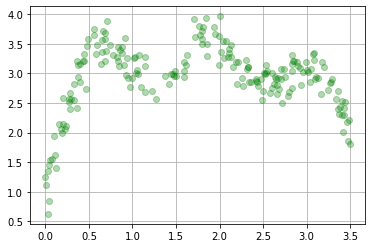

In [17]:
plt.plot(X_test, y_test, 'og', alpha=0.3)
plt.grid()
plt.show()

In [18]:
fs = MFScan(n_exps=2,
#             filling_pulse=2*10**-5,
            n_iters=200,
            stop_val=10**-5,
            verbose=True
           )

fs.fit(X=X_train, y=y_train)

iter # 0
exps_params:
 [[-2.89752767  1.        ]
 [-1.41435035  1.        ]]
Loss: 5.380952638838264
iter # 1
exps_params:
 [[-2.8414916   1.14502634]
 [-1.42107811  1.18075384]]
Loss: 4.827942683846146
iter # 2
exps_params:
 [[-2.78684897  1.28382596]
 [-1.4216487   1.34919633]]
Loss: 4.33729357759413
iter # 3
exps_params:
 [[-2.73670218  1.4161225 ]
 [-1.41438044  1.50559543]]
Loss: 3.906610052457261
iter # 4
exps_params:
 [[-2.69345629  1.54176142]
 [-1.39884079  1.6504566 ]]
Loss: 3.5307895419209014
iter # 5
exps_params:
 [[-2.65840733  1.6608171 ]
 [-1.37604674  1.78455479]]
Loss: 3.2028612177639353
iter # 6
exps_params:
 [[-2.631633    1.77359256]
 [-1.34830977  1.90885469]]
Loss: 2.9157608952768816
iter # 7
exps_params:
 [[-2.61227127  1.88051971]
 [-1.31868009  2.02435989]]
Loss: 2.6636563118226673
iter # 8
exps_params:
 [[-2.59903152  1.98202758]
 [-1.29012366  2.13197726]]
Loss: 2.4420663039632284
iter # 9
exps_params:
 [[-2.59066136  2.07845486]
 [-1.26476709  2.23246117]]


iter # 80
exps_params:
 [[-2.75843621  3.7315414 ]
 [-1.14572323  3.91225104]]
Loss: 0.6770971488040384
iter # 81
exps_params:
 [[-2.75871978  3.73323179]
 [-1.14570957  3.91439825]]
Loss: 0.6770236140257532
iter # 82
exps_params:
 [[-2.75898946  3.7348285 ]
 [-1.14569724  3.91643921]]
Loss: 0.6769574889498742
iter # 83
exps_params:
 [[-2.75924592  3.73633663]
 [-1.14568615  3.91837924]]
Loss: 0.6768980243393048
iter # 84
exps_params:
 [[-2.75948984  3.73776102]
 [-1.14567621  3.9202234 ]]
Loss: 0.6768445469406614
iter # 85
exps_params:
 [[-2.75972184  3.73910622]
 [-1.14566733  3.92197652]]
Loss: 0.6767964517570921
iter # 86
exps_params:
 [[-2.75994252  3.74037657]
 [-1.14565943  3.92364314]]
Loss: 0.6767531951090882
iter # 87
exps_params:
 [[-2.76015244  3.74157615]
 [-1.14565245  3.9252276 ]]
Loss: 0.6767142884029677
iter # 88
exps_params:
 [[-2.76035215  3.74270883]
 [-1.14564632  3.926734  ]]
Loss: 0.6766792925342228
iter # 89
exps_params:
 [[-2.76054214  3.74377826]
 [-1.14564096

MFScan(n_exps=2, n_iters=200, stop_val=1e-05, verbose=True)

In [19]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.76673555 0.80710657 0.82484226 0.76613444 0.86840405 0.81873138
 0.92925909 0.90975489 0.78867721 0.78492996]
Mean: 0.8264575410895827
Standard deviation: 0.05482733468615327


In [20]:
fs.fit_results_

,loss,n_exps,time_constatn_power_0,amplitude_0,time_constatn_power_1,amplitude_1
0,5.380953,2,-2.897528,1.000000,-1.414350,1.000000
1,4.827943,2,-2.841492,1.145026,-1.421078,1.180754
2,4.337294,2,-2.786849,1.283826,-1.421649,1.349196
3,3.90661,2,-2.736702,1.416122,-1.414380,1.505595
4,3.53079,2,-2.693456,1.541761,-1.398841,1.650457
...,...,...,...,...,...,...
96,0.6765,2,-2.761638,3.749762,-1.145621,3.936405
97,0.676487,2,-2.761766,3.750435,-1.145620,3.937363
98,0.676475,2,-2.761887,3.751071,-1.145619,3.938274
99,0.676464,2,-2.762003,3.751671,-1.145619,3.939140


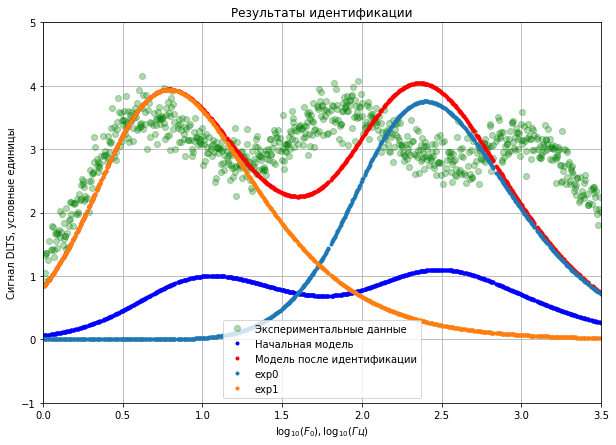

In [21]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

In [22]:
fs = MFScan(n_exps=5,
#             filling_pulse=2*10**-5,
            n_iters=200,
            stop_val=10**-5,
            verbose=True
           )

fs.fit(X=X_train, y=y_train)

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

iter # 0
exps_params:
 [[-2.66140471  1.        ]
 [-2.43539722  1.        ]
 [-1.4128585   1.        ]
 [-2.05890895  1.        ]
 [-2.33214872  1.        ]]
Loss: 2.488251814862973
iter # 1
exps_params:
 [[-2.71995261  1.02416607]
 [-2.45342151  1.0153025 ]
 [-1.29616939  1.08941734]
 [-2.00001561  1.02306889]
 [-2.32909398  1.01452296]]
Loss: 2.186345251751151
iter # 2
exps_params:
 [[-2.78131986  1.05236201]
 [-2.47132006  1.03286004]
 [-1.19651087  1.18438102]
 [-1.93629707  1.05108136]
 [-2.32414714  1.03128278]]
Loss: 1.9004496679526277
iter # 3
exps_params:
 [[-2.84429279  1.08413664]
 [-2.48833681  1.05238236]
 [-1.11947699  1.27959813]
 [-1.86969415  1.08385362]
 [-2.31711058  1.05009678]]
Loss: 1.6427014796024302
iter # 4
exps_params:
 [[-2.90773686  1.11891039]
 [-2.50416239  1.07348991]
 [-1.06418089  1.37085527]
 [-1.80271376  1.1204635 ]
 [-2.30854369  1.07063188]]
Loss: 1.4133262109118556
iter # 5
exps_params:
 [[-2.97035341  1.15605417]
 [-2.51858312  1.09586904]
 [-1.

iter # 45
exps_params:
 [[-3.54873068  2.02086004]
 [-2.56657757  1.55374165]
 [-0.86645024  2.10323799]
 [-1.24045724  1.6087195 ]
 [-2.23906131  1.5650049 ]]
Loss: 0.06566849160084087
iter # 46
exps_params:
 [[-3.54968462  2.02956664]
 [-2.56589811  1.55512234]
 [-0.86606926  2.10264717]
 [-1.23904193  1.60777752]
 [-2.23759008  1.56695796]]
Loss: 0.0647973158227114
iter # 47
exps_params:
 [[-3.55054021  2.0380188 ]
 [-2.56517203  1.55637372]
 [-0.86574869  2.10197485]
 [-1.23762116  1.6067661 ]
 [-2.23615216  1.5687811 ]]
Loss: 0.06397685446735352
iter # 48
exps_params:
 [[-3.55130449  2.04622816]
 [-2.56440003  1.55750557]
 [-0.86548582  2.10122913]
 [-1.23619389  1.60569267]
 [-2.23474927  1.57048356]]
Loss: 0.06320246723340267
iter # 49
exps_params:
 [[-3.55198398  2.05420567]
 [-2.56358309  1.5585268 ]
 [-0.86527802  2.10041731]
 [-1.2347594   1.60456396]
 [-2.23338274  1.57207373]]
Loss: 0.06247004632256108
iter # 50
exps_params:
 [[-3.55258461  2.06196165]
 [-2.56272241  1.559

iter # 89
exps_params:
 [[-3.54791088  2.25796236]
 [-2.51261844  1.55855128]
 [-0.88129918  2.05312466]
 [-1.17533112  1.549966  ]
 [-2.20458802  1.59021045]]
Loss: 0.048137939498500676
iter # 90
exps_params:
 [[-3.54752218  2.2612716 ]
 [-2.5112649   1.55814092]
 [-0.88197334  2.05202033]
 [-1.17392875  1.54876265]
 [-2.20431794  1.59011114]]
Loss: 0.04795637976762133
iter # 91
exps_params:
 [[-3.54713164  2.26452497]
 [-2.50991844  1.55772505]
 [-0.88265096  2.05092878]
 [-1.17253509  1.54757458]
 [-2.2040618   1.58999991]]
Loss: 0.04777947583745599
iter # 92
exps_params:
 [[-3.54673966  2.26772377]
 [-2.5085794   1.55730416]
 [-0.88333162  2.04985019]
 [-1.17115029  1.5464019 ]
 [-2.20381921  1.58987734]]
Loss: 0.047607097260534116
iter # 93
exps_params:
 [[-3.54634662  2.27086925]
 [-2.50724808  1.55687872]
 [-0.88401494  2.0487847 ]
 [-1.1697745   1.54524468]
 [-2.20358982  1.58974399]]
Loss: 0.04743911864831785
iter # 94
exps_params:
 [[-3.54595286  2.27396261]
 [-2.50592477  1.

iter # 133
exps_params:
 [[-3.53204111  2.36326149]
 [-2.4617187   1.539269  ]
 [-0.91078124  2.01692931]
 [-1.12282445  1.51106487]
 [-2.20215082  1.57982327]]
Loss: 0.043281036415913264
iter # 134
exps_params:
 [[-3.53174459  2.36492542]
 [-2.46077642  1.53885716]
 [-0.91139555  2.01637767]
 [-1.12185268  1.51047816]
 [-2.20225104  1.57952881]]
Loss: 0.043221595287854304
iter # 135
exps_params:
 [[-3.53145139  2.36656486]
 [-2.45984298  1.53844772]
 [-0.91200614  2.01583617]
 [-1.12089022  1.50990235]
 [-2.2023558   1.57923415]]
Loss: 0.043163610779985574
iter # 136
exps_params:
 [[-3.53116148  2.36818021]
 [-2.45891829  1.53804071]
 [-0.91261297  2.01530466]
 [-1.119937    1.50933727]
 [-2.20246499  1.57893936]]
Loss: 0.04310704493516033
iter # 137
exps_params:
 [[-3.53087485  2.36977186]
 [-2.45800226  1.53763616]
 [-0.91321604  2.01478299]
 [-1.11899297  1.50878276]
 [-2.20257848  1.57864453]]
Loss: 0.04305186076304187
iter # 138
exps_params:
 [[-3.53059148  2.37134017]
 [-2.45709

iter # 177
exps_params:
 [[-3.521813    2.41767975]
 [-2.42750217  1.52354331]
 [-0.93416812  2.00044196]
 [-1.08796276  1.49356195]
 [-2.209611    1.56742633]]
Loss: 0.041650774119119056
iter # 178
exps_params:
 [[-3.52163825  2.4185607 ]
 [-2.42687014  1.52324201]
 [-0.93461482  2.00021172]
 [-1.0873348   1.49331757]
 [-2.20982823  1.56716955]]
Loss: 0.04162972450202021
iter # 179
exps_params:
 [[-3.52146562  2.41942935]
 [-2.42624345  1.52294305]
 [-0.93505799  1.99998625]
 [-1.08671308  1.49307823]
 [-2.21004668  1.56691418]]
Loss: 0.04160913293616679
iter # 180
exps_params:
 [[-3.52129508  2.4202859 ]
 [-2.42562202  1.52264641]
 [-0.93549766  1.99976546]
 [-1.08609752  1.49284385]
 [-2.21026628  1.56666022]]
Loss: 0.041588987812190246
iter # 181
exps_params:
 [[-3.5211266   2.42113053]
 [-2.4250058   1.52235209]
 [-0.93593383  1.99954928]
 [-1.08548805  1.49261432]
 [-2.21048701  1.56640767]]
Loss: 0.041569277836289234
iter # 182
exps_params:
 [[-3.52096015  2.42196342]
 [-2.42439

In [23]:
grid_search = GridSearchCV(fs, {'n_exps':[2,3,4,5,6,7]}, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)

In [24]:
grid_search.fit(X_train, y_train)

iter # 0
exps_params:
 [[-1.39797533  1.        ]
 [-1.87283449  1.        ]
 [-2.05657534  1.        ]]
Loss: 4.001541936257735
iter # 1
exps_params:
 [[-1.34353467  1.10794196]
 [-1.89327596  1.09689694]
 [-2.10660032  1.10357122]]
Loss: 3.6333826776084335
iter # 2
exps_params:
 [[-1.27839791  1.20871282]
 [-1.91739116  1.18235919]
 [-2.1678919   1.19762323]]
Loss: 3.2887730176935794
iter # 3
exps_params:
 [[-1.21037536  1.30602154]
 [-1.94289721  1.25983649]
 [-2.23689091  1.28551005]]
Loss: 2.9621035279842096
iter # 4
exps_params:
 [[-1.14934868  1.40169881]
 [-1.96639848  1.3318629 ]
 [-2.30890508  1.36920152]]
Loss: 2.662287258543509
iter # 5
exps_params:
 [[-1.10229256  1.49571077]
 [-1.98464352  1.39980139]
 [-2.38033761  1.44929002]]
Loss: 2.3956102949916316
iter # 6
exps_params:
 [[-1.07040335  1.58715947]
 [-1.99579164  1.46413243]
 [-2.44980897  1.52568437]]
Loss: 2.159524390795683
iter # 7
exps_params:
 [[-1.05072088  1.67519469]
 [-1.99971469  1.52504309]
 [-2.51740907  1

iter # 63
exps_params:
 [[-0.99937895  3.31824878]
 [-2.25164593  2.81491383]
 [-3.43871996  2.62952598]]
Loss: 0.05304182944300134
iter # 64
exps_params:
 [[-0.9994143   3.32455543]
 [-2.25318044  2.82067291]
 [-3.44098865  2.62848116]]
Loss: 0.052241667289747634
iter # 65
exps_params:
 [[-0.99945209  3.33059512]
 [-2.25466252  2.82623026]
 [-3.44316875  2.62735554]]
Loss: 0.05149980739545219
iter # 66
exps_params:
 [[-0.99949197  3.33637975]
 [-2.25609419  2.83159442]
 [-3.44526404  2.62615674]]
Loss: 0.050811456743404565
iter # 67
exps_params:
 [[-0.99953365  3.34192066]
 [-2.25747738  2.83677351]
 [-3.44727814  2.62489188]]
Loss: 0.05017225415970646
iter # 68
exps_params:
 [[-0.99957684  3.34722869]
 [-2.25881395  2.84177524]
 [-3.44921449  2.62356755]]
Loss: 0.049578228599952825
iter # 69
exps_params:
 [[-0.99962129  3.35231413]
 [-2.26010564  2.84660693]
 [-3.45107636  2.62218993]]
Loss: 0.04902576170588899
iter # 70
exps_params:
 [[-0.99966675  3.35718682]
 [-2.26135416  2.85127

iter # 125
exps_params:
 [[-1.0015361   3.46085791]
 [-2.2932276   2.97279488]
 [-3.49441684  2.54200187]]
Loss: 0.040887997450858
iter # 126
exps_params:
 [[-1.00155242  3.46137589]
 [-2.29345531  2.97372166]
 [-3.49467444  2.54101926]]
Loss: 0.04086614497970855
iter # 127
exps_params:
 [[-1.00156826  3.46187489]
 [-2.29367688  2.97462562]
 [-3.49492441  2.54005457]]
Loss: 0.040845305762969755
iter # 128
exps_params:
 [[-1.00158366  3.46235566]
 [-2.29389251  2.9755074 ]
 [-3.49516702  2.53910758]]
Loss: 0.04082543012714656
iter # 129
exps_params:
 [[-1.00159861  3.46281891]
 [-2.29410236  2.97636763]
 [-3.49540251  2.53817809]]
Loss: 0.040806471056912826
iter # 130
exps_params:
 [[-1.00161312  3.46326532]
 [-2.29430661  2.97720689]
 [-3.49563113  2.53726589]]
Loss: 0.0407883840350906
iter # 131
exps_params:
 [[-1.00162721  3.46369554]
 [-2.29450542  2.97802578]
 [-3.49585312  2.53637075]]
Loss: 0.04077112689356808
iter # 132
exps_params:
 [[-1.00164089  3.4641102 ]
 [-2.29469896  2.9

GridSearchCV(cv=5,
             estimator=MFScan(n_exps=5, n_iters=200, stop_val=1e-05,
                              verbose=True),
             n_jobs=-1, param_grid={'n_exps': [2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'n_exps': 3}

In [26]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20457237 0.17558969 0.2263626  0.21250056 0.17202828 0.20200837
 0.20590844 0.21629275 0.19642356 0.21186968]
Mean: 0.20235562894417053
Standard deviation: 0.016288106834834983


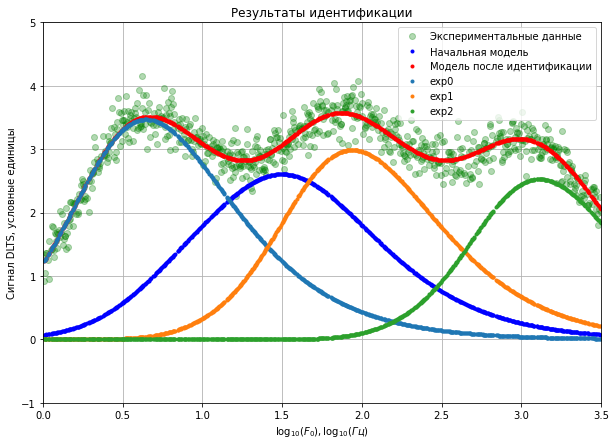

In [27]:
fit_results = grid_search.best_estimator_.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.20308583395077998